In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
plt.rcParams['figure.figsize']=25,18
import warnings
warnings.filterwarnings('ignore')
import numpy as np
pyo.init_notebook_mode(connected=True)
cf.go_offline()
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows',None)


In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/Venkatdata2020/Covid-19-Data-Science-Prediction/main/covid_19_data.csv")

In [63]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [64]:
df.shape

(172480, 8)

In [65]:
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [66]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [67]:
df.rename(columns={'ObservationDate':'Date'},inplace=True)
df.rename(columns={'Province/State':'State'},inplace=True)

In [68]:
df.columns

Index(['SNo', 'Date', 'State', 'Country', 'Last Update', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [69]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [70]:
df.tail()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.00,337.00,6556.00
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.00,104.00,0.00
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.00,1.00,1288.00
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.00,531.00,22263.00
172479,172480,12/06/2020,Zuid-Holland,Netherlands,2020-12-07 05:26:14,154813.00,2414.00,0.00


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172480 entries, 0 to 172479
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SNo          172480 non-null  int64  
 1   Date         172480 non-null  object 
 2   State        124597 non-null  object 
 3   Country      172480 non-null  object 
 4   Last Update  172480 non-null  object 
 5   Confirmed    172480 non-null  float64
 6   Deaths       172480 non-null  float64
 7   Recovered    172480 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.5+ MB


In [72]:
df.isnull().sum()

SNo                0
Date               0
State          47883
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [73]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,172480.00,172480.00,172480.00,172480.00
mean,86240.50,33231.56,1050.03,21028.25
std,49790.83,103134.89,3499.44,115659.79
min,1.00,-302844.00,-178.00,-854405.00
25%,43120.75,457.00,6.00,10.00
50%,86240.50,4016.50,76.00,858.00
75%,129360.25,18843.00,554.00,7229.00
max,172480.00,2290891.00,54804.00,5624444.00


In [74]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

In [75]:
confirmed

,Date,Confirmed
0,01/22/2020,555.00
1,01/23/2020,653.00
2,01/24/2020,941.00
3,01/25/2020,1438.00
4,01/26/2020,2118.00
...,...,...
315,12/02/2020,64530517.00
316,12/03/2020,65221040.00
317,12/04/2020,65899441.00
318,12/05/2020,66540034.00


In [76]:
death = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

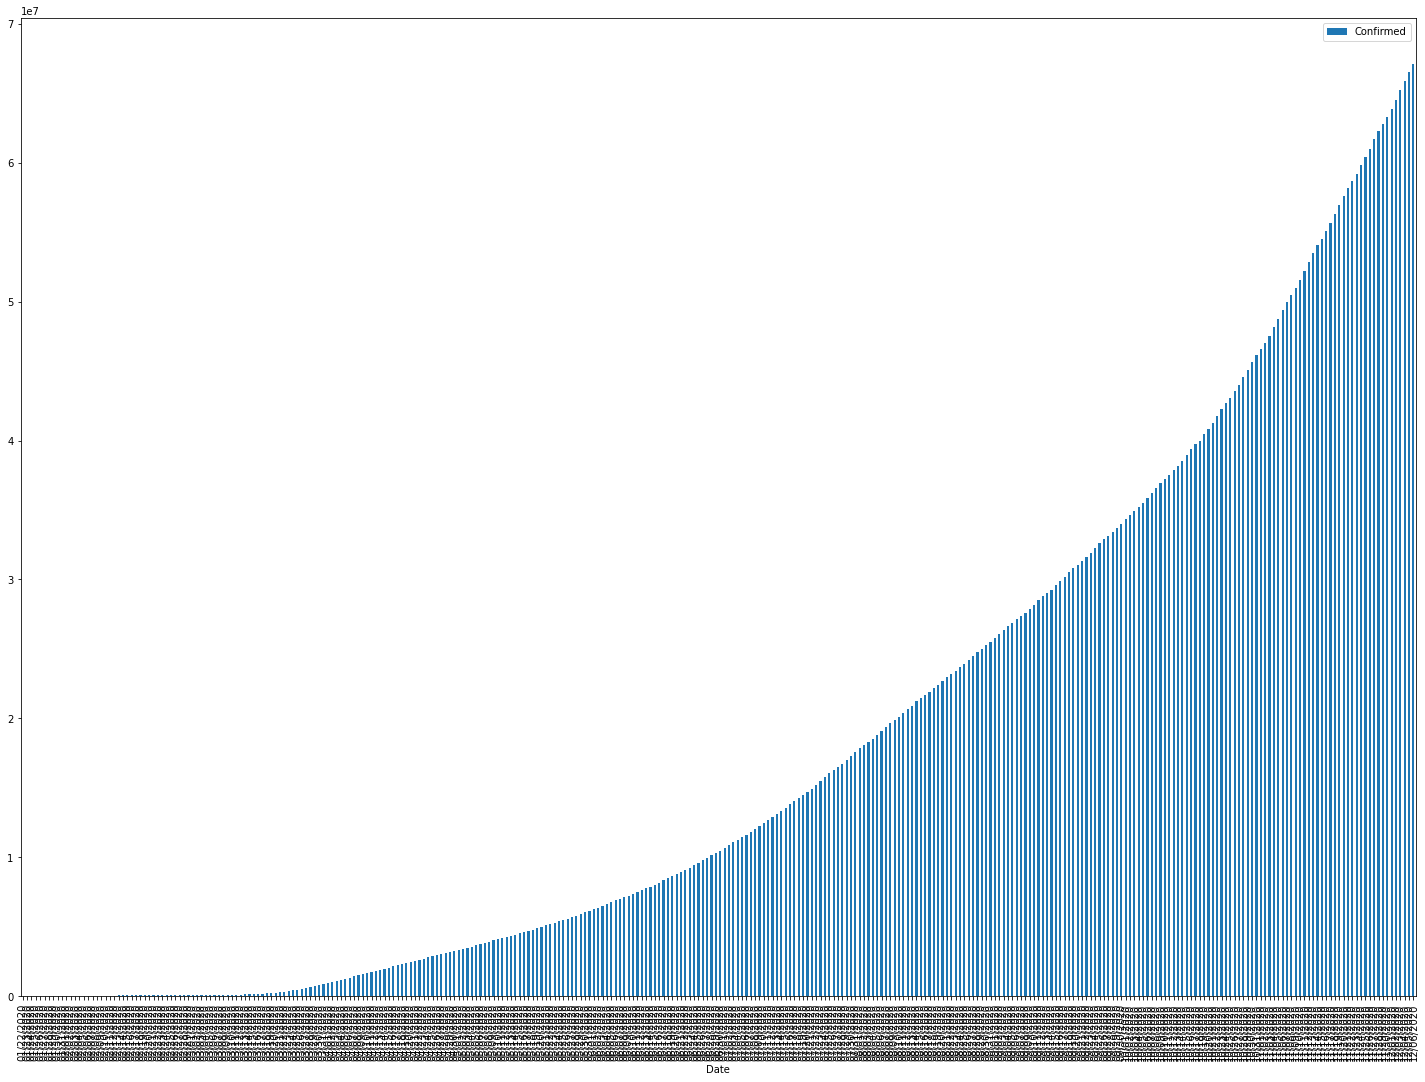

In [77]:
#plt.figure(figsize=(10,10))
confirmed.plot(kind='bar',x="Date",y='Confirmed')
plt.show()

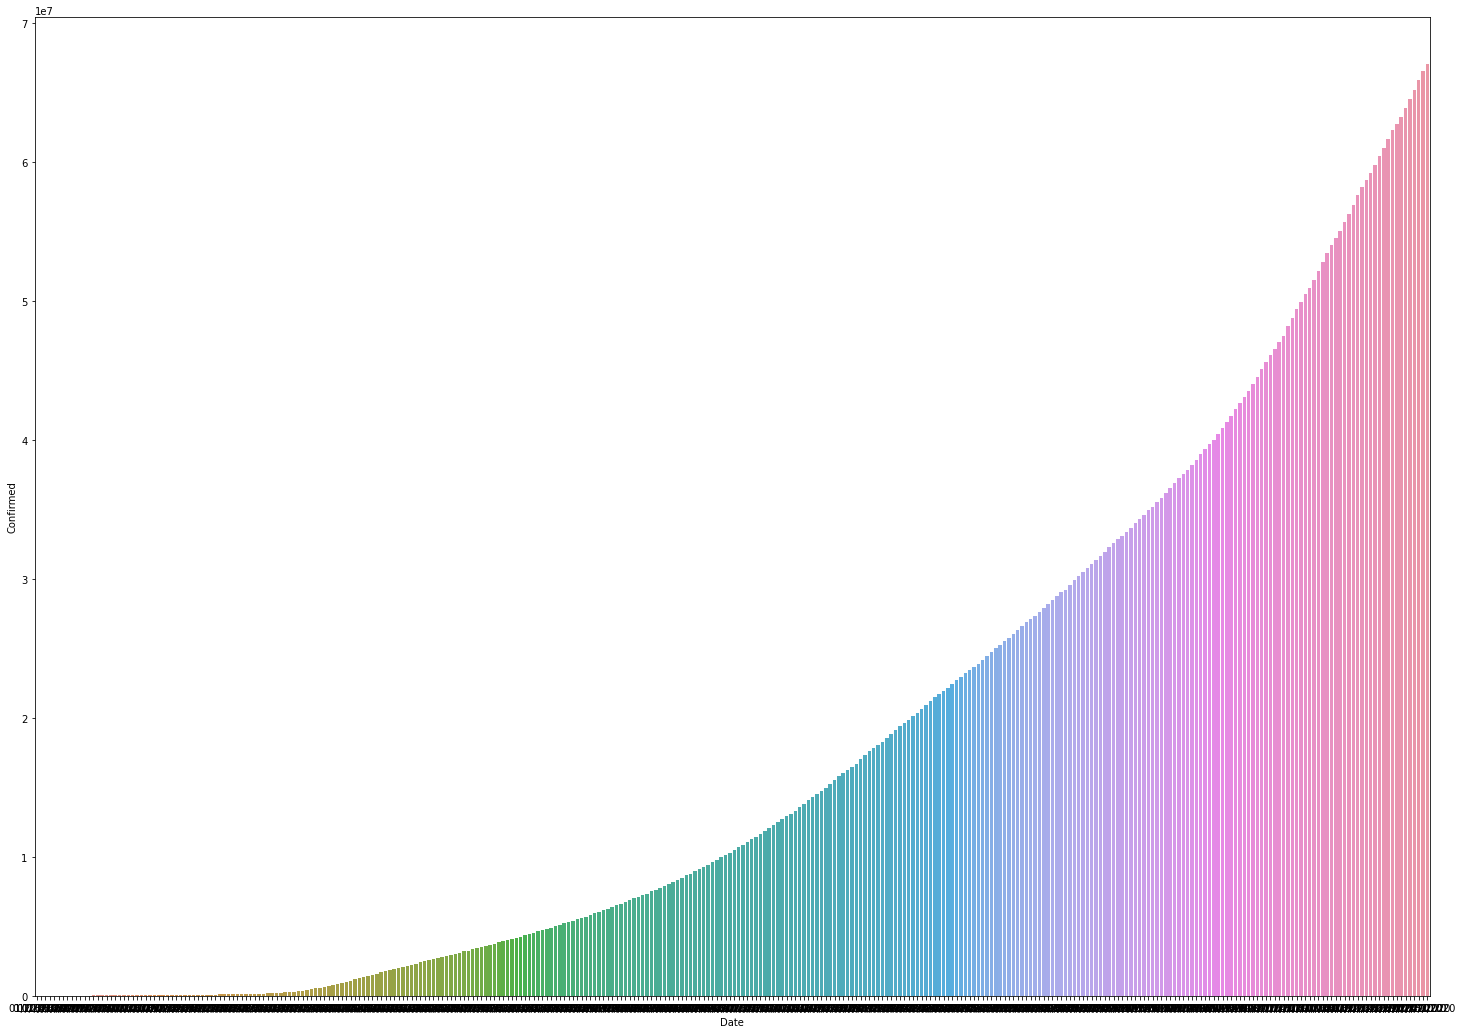

In [78]:
sns.barplot(x=confirmed['Date'],y=confirmed['Confirmed'])

<BarContainer object of 320 artists>

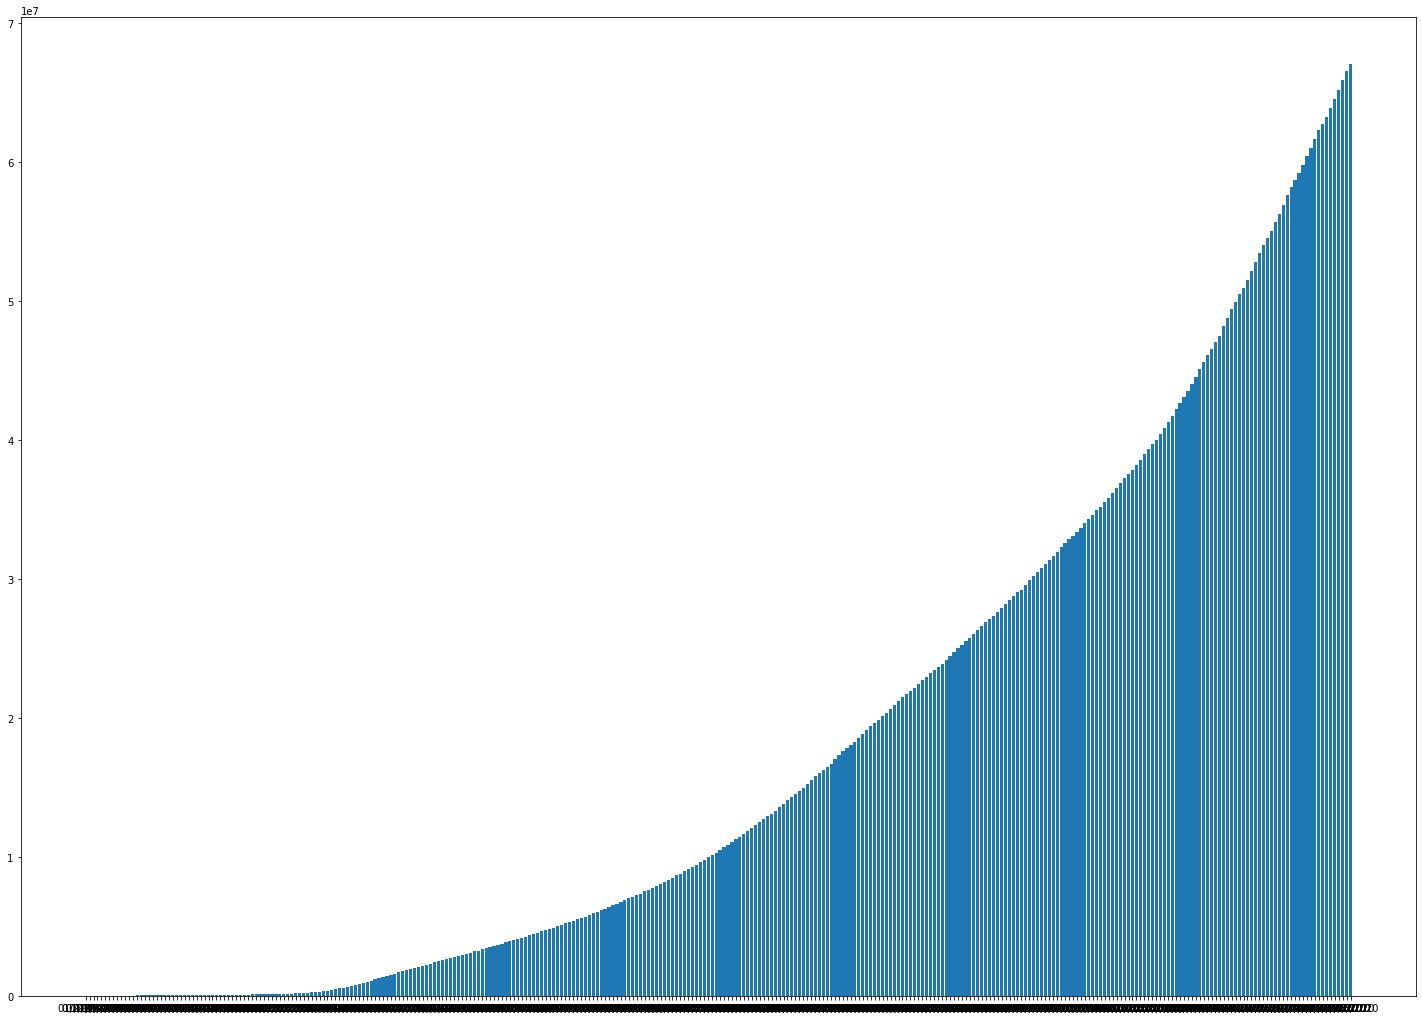

In [79]:
plt.bar(x=confirmed['Date'],height=confirmed['Confirmed'])

In [81]:
confirmed.iplot(kind='bar',x='Date',y="Confirmed")
plt.show()

In [82]:
#Prediction

In [83]:
import fbprophet

In [84]:
from fbprophet import Prophet

In [85]:
confirmed.columns=['ds','y']

In [86]:
confirmed.head()

,ds,y
0,01/22/2020,555.00
1,01/23/2020,653.00
2,01/24/2020,941.00
3,01/25/2020,1438.00
4,01/26/2020,2118.00


In [87]:
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [88]:
confirmed.head()

,ds,y
0,2020-01-22,555.00
1,2020-01-23,653.00
2,2020-01-24,941.00
3,2020-01-25,1438.00
4,2020-01-26,2118.00


In [89]:
confirmed.tail()

,ds,y
315,2020-12-02,64530517.00
316,2020-12-03,65221040.00
317,2020-12-04,65899441.00
318,2020-12-05,66540034.00
319,2020-12-06,67073728.00


In [90]:
model=Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
future = model.make_future_dataframe(periods=100)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [103]:
forecast_confirmed = model.predict(future)

In [104]:
forecast_confirmed

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-46471.05,-928458.51,923592.97,-46471.05,-46471.05,-18306.81,-18306.81,-18306.81,-18306.81,-18306.81,-18306.81,0.00,0.00,0.00,-64777.86
1,2020-01-23,-42557.91,-946447.41,898934.99,-42557.91,-42557.91,5076.57,5076.57,5076.57,5076.57,5076.57,5076.57,0.00,0.00,0.00,-37481.33
2,2020-01-24,-38644.76,-952695.15,963377.51,-38644.76,-38644.76,36906.10,36906.10,36906.10,36906.10,36906.10,36906.10,0.00,0.00,0.00,-1738.66
3,2020-01-25,-34731.62,-965128.66,876532.57,-34731.62,-34731.62,41658.99,41658.99,41658.99,41658.99,41658.99,41658.99,0.00,0.00,0.00,6927.37
4,2020-01-26,-30818.47,-948874.60,894704.74,-30818.47,-30818.47,15787.28,15787.28,15787.28,15787.28,15787.28,15787.28,0.00,0.00,0.00,-15031.20
5,2020-01-27,-26905.33,-1021296.94,810948.20,-26905.33,-26905.33,-40092.26,-40092.26,-40092.26,-40092.26,-40092.26,-40092.26,0.00,0.00,0.00,-66997.59
6,2020-01-28,-22992.18,-926370.43,835247.34,-22992.18,-22992.18,-41029.87,-41029.87,-41029.87,-41029.87,-41029.87,-41029.87,0.00,0.00,0.00,-64022.05
7,2020-01-29,-19079.04,-941182.22,875555.42,-19079.04,-19079.04,-18306.81,-18306.81,-18306.81,-18306.81,-18306.81,-18306.81,0.00,0.00,0.00,-37385.85
8,2020-01-30,-15165.89,-943985.98,955810.67,-15165.89,-15165.89,5076.57,5076.57,5076.57,5076.57,5076.57,5076.57,0.00,0.00,0.00,-10089.32
9,2020-01-31,-11252.75,-880827.16,1019539.49,-11252.75,-11252.75,36906.10,36906.10,36906.10,36906.10,36906.10,36906.10,0.00,0.00,0.00,25653.35


In [105]:
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-64777.86,-928458.51,923592.97
1,2020-01-23,-37481.33,-946447.41,898934.99
2,2020-01-24,-1738.66,-952695.15,963377.51
3,2020-01-25,6927.37,-965128.66,876532.57
4,2020-01-26,-15031.20,-948874.60,894704.74
5,2020-01-27,-66997.59,-1021296.94,810948.20
6,2020-01-28,-64022.05,-926370.43,835247.34
7,2020-01-29,-37385.85,-941182.22,875555.42
8,2020-01-30,-10089.32,-943985.98,955810.67
9,2020-01-31,25653.35,-880827.16,1019539.49


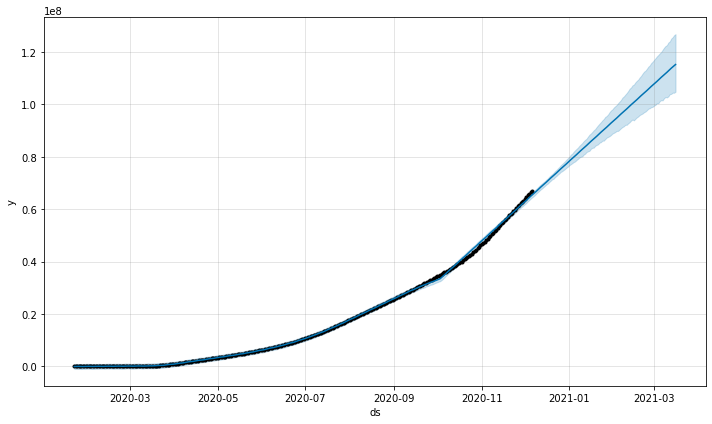

In [107]:
confirmed_forecast_plot = model.plot(forecast_confirmed)

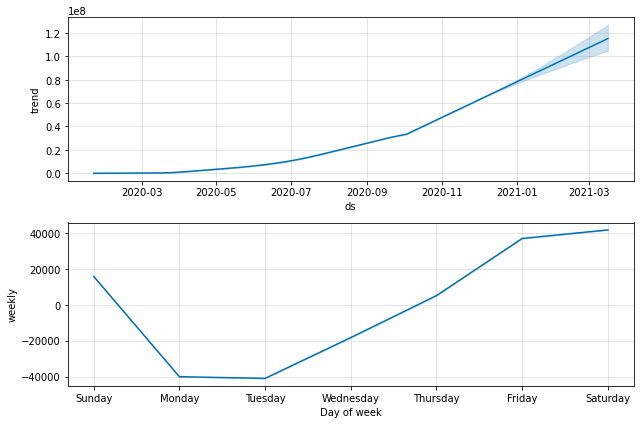

In [108]:
confirmed_forecast_plot_components = model.plot_components(forecast_confirmed)